# Get Immutable Reference Benchmarks

In [1]:
# select measurement file
file_name = "../output/2025-03-09 14-19-20.json"

# plot settings
show_error_bar = False

In [2]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [3]:
from util.convert import convert_datasets
import pandas as pd

heap = convert_datasets(
    raw_data,
    "vNV-Heap",
    [("kvs", "vNV-Heap")],
    ["mean", "min", "max", "options.inner.iterations", "options.inner.object_count", "options.inner.access_type", "options.object_size", "options.inner.kvs_options.page_size", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = convert_datasets(
    raw_data,
    "Paged",
    [("kvs_paged", "Paged")],
    ["mean", "min", "max", "options.inner.iterations", "options.inner.object_count", "options.inner.access_type", "options.object_size", "options.inner.kvs_options.page_size", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = baseline[baseline["options.inner.kvs_options.page_size"].isin([16, 64, 256, 1024])]

dataset = pd.concat([heap, baseline])
dataset.rename({"options.inner.iterations": "options.iterations"}, axis=1, inplace=True)
dataset.rename({"options.inner.object_count": "options.object_count"}, axis=1, inplace=True)
dataset.rename({"options.inner.access_type": "options.access_type"}, axis=1, inplace=True)
dataset.rename({"options.inner.kvs_options.page_size": "options.page_size"}, axis=1, inplace=True)

dataset["options.access_type"] = dataset["options.access_type"].astype(str)
dataset

[{'mean': 69504338.0, 'min': 69504338, 'max': 69504338, 'options.inner': {'iterations': 1000, 'object_count': 256, 'access_type': 'Random', 'kvs_options': {'max_dirty': 11706}}, 'options.inner.iterations': 1000, 'options.inner.object_count': 256, 'options.inner.access_type': 'Random', 'options.inner.kvs_options': {'max_dirty': 11706}, 'options.inner.kvs_options.max_dirty': 11706, 'options.object_sizes': [32, 128, 256, 1024], 'options.object_count_distribution': [64, 128, 32, 32], 'bench_name': 'kvs', 'machine_name': 'esp32c3', 'cold_start': 0, 'repetitions': 1, 'ticks_per_ms': 16000}, {'mean': 66950439.0, 'min': 66950439, 'max': 66950439, 'options.inner': {'iterations': 1000, 'object_count': 256, 'access_type': 'Sequential', 'kvs_options': {'max_dirty': 11706}}, 'options.inner.iterations': 1000, 'options.inner.object_count': 256, 'options.inner.access_type': 'Sequential', 'options.inner.kvs_options': {'max_dirty': 11706}, 'options.inner.kvs_options.max_dirty': 11706, 'options.object_si

,mean,min,max,options.iterations,options.object_count,options.access_type,options.object_size,options.page_size,machine_name,cold_start,repetitions,ticks_per_ms,dataset_type,benchmark_title,benchmark_id
0,69504338.0,69504338,69504338,1000,256,Random,NaN,NaN,esp32c3,0,1,16000,vNV-Heap,vNV-Heap,kvs
1,66950439.0,66950439,66950439,1000,256,Sequential,NaN,NaN,esp32c3,0,1,16000,vNV-Heap,vNV-Heap,kvs
2,60037735.0,60037735,60037735,1000,256,"{'Partitioned': {'partition_size': 16, 'access...",NaN,NaN,esp32c3,0,1,16000,vNV-Heap,vNV-Heap,kvs
3,57528647.0,57528647,57528647,1000,256,"{'Distributed': {'key_distribution': [5994238,...",NaN,NaN,esp32c3,0,1,16000,vNV-Heap,vNV-Heap,kvs
0,67036886.0,67036886,67036886,1000,256,Random,NaN,16.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged
1,71307342.0,71307342,71307342,1000,256,Sequential,NaN,16.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged
2,47892918.0,47892918,47892918,1000,256,"{'Partitioned': {'partition_size': 16, 'access...",NaN,16.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged
3,50296775.0,50296775,50296775,1000,256,"{'Distributed': {'key_distribution': [5994238,...",NaN,16.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged
8,67251093.0,67251093,67251093,1000,256,Random,NaN,64.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged
9,69772316.0,69772316,69772316,1000,256,Sequential,NaN,64.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged


## Compare the latencies

In [4]:
from util.convert import scale_data
from IPython.display import HTML, display
import numpy as np
from math import isnan

unit = "us"
scaled = scale_data(dataset, unit)
pages_sizes = list(filter(lambda x: not isnan(x), scaled["options.page_size"].unique()))

for access_type in scaled["options.access_type"].unique():
    filtered_access_type = scaled[scaled["options.access_type"] == access_type]

    display(HTML(f"<b>ACCESS TYPE: {access_type}</b>"))

    res = []
    
    for pages_size in pages_sizes:

        right = filtered_access_type[filtered_access_type["options.page_size"] == pages_size]
        left = filtered_access_type[filtered_access_type["options.page_size"].isna()]

        assert(len(left["benchmark_id"].unique()) == 1)
        assert(len(right["benchmark_id"].unique()) == 1)

        a = left["mean"].iloc[0]
        b = right["mean"].iloc[0]
        res.append((pages_size, a,b,(100 * a)/b - 100, (100 * b)/a - 100))

    d = pd.DataFrame(res, columns=["Page size", f"{left["benchmark_id"].iloc[0]} [{unit}]", f"{right["benchmark_id"].iloc[0]} [{unit}]", "% Worse", "% Better"])

    display(d)
    print("Stats:")
    display(d.describe())

,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,16.0,4344021.125,4.189805e+06,3.680738,-3.550069
1,64.0,4344021.125,4.203193e+06,3.350496,-3.241877
2,256.0,4344021.125,6.416067e+06,-32.294639,47.698793
3,1024.0,4344021.125,1.776497e+07,-75.547265,308.952201


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,4.000000,4.000,4.000000e+00,4.000000,4.000000
mean,340.000000,4344021.125,8.143509e+06,-25.202668,87.464762
std,467.640888,0.000,6.499088e+06,37.569530,149.609950
min,16.000000,4344021.125,4.189805e+06,-75.547265,-3.550069
25%,52.000000,4344021.125,4.199846e+06,-43.107796,-3.318925
50%,160.000000,4344021.125,5.309630e+06,-14.472072,22.228458
75%,448.000000,4344021.125,9.253293e+06,3.433056,113.012145
max,1024.000000,4344021.125,1.776497e+07,3.680738,308.952201


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,16.0,4.184402e+06,4.456709e+06,-6.110034,6.507654
1,64.0,4.184402e+06,4.360770e+06,-4.044408,4.214875
2,256.0,4.184402e+06,4.341338e+06,-3.614911,3.750488
3,1024.0,4.184402e+06,4.344352e+06,-3.681793,3.822531


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000
mean,340.000000,4.184402e+06,4.375792e+06,-4.362786,4.573887
std,467.640888,0.000000e+00,5.461603e+04,1.180015,1.305229
min,16.000000,4.184402e+06,4.341338e+06,-6.110034,3.750488
25%,52.000000,4.184402e+06,4.343599e+06,-4.560814,3.804520
50%,160.000000,4.184402e+06,4.352561e+06,-3.863100,4.018703
75%,448.000000,4.184402e+06,4.384755e+06,-3.665072,4.788069
max,1024.000000,4.184402e+06,4.456709e+06,-3.614911,6.507654


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,16.0,3.752358e+06,2.993307e+06,25.358273,-20.228640
1,64.0,3.752358e+06,2.841985e+06,32.033031,-24.261377
2,256.0,3.752358e+06,3.666549e+06,2.340324,-2.286805
3,1024.0,3.752358e+06,5.637783e+06,-33.442656,50.246381


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000
mean,340.000000,3.752358e+06,3.784906e+06,6.572243,0.867390
std,467.640888,0.000000e+00,1.286195e+06,29.553725,34.276965
min,16.000000,3.752358e+06,2.841985e+06,-33.442656,-24.261377
25%,52.000000,3.752358e+06,2.955477e+06,-6.605421,-21.236824
50%,160.000000,3.752358e+06,3.329928e+06,13.849298,-11.257722
75%,448.000000,3.752358e+06,4.159358e+06,27.026963,10.846491
max,1024.000000,3.752358e+06,5.637783e+06,32.033031,50.246381


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,16.0,3.595540e+06,3.143548e+06,14.378401,-12.570906
1,64.0,3.595540e+06,2.943236e+06,22.162834,-18.142043
2,256.0,3.595540e+06,4.478401e+06,-19.713750,24.554329
3,1024.0,3.595540e+06,1.447129e+07,-75.153968,302.478746


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000
mean,340.000000,3.595540e+06,6.259118e+06,-14.581621,74.080031
std,467.640888,0.000000e+00,5.517019e+06,44.287642,153.440612
min,16.000000,3.595540e+06,2.943236e+06,-75.153968,-18.142043
25%,52.000000,3.595540e+06,3.093470e+06,-33.573804,-13.963690
50%,160.000000,3.595540e+06,3.810975e+06,-2.667674,5.991711
75%,448.000000,3.595540e+06,6.976622e+06,16.324509,94.035433
max,1024.000000,3.595540e+06,1.447129e+07,22.162834,302.478746


# Final Plots

/tmp/ipykernel_255200/3857432775.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paged_data["options.page_size"] = paged_data["options.page_size"].astype(int)
/tmp/ipykernel_255200/3857432775.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paged_data["benchmark_title"] = "ManagedState"
/tmp/ipykernel_255200/3857432775.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

[<matplotlib.lines.Line2D object at 0x7f592ac19400>, [<matplotlib.patches.Patch object at 0x7f592aca6cc0>, <matplotlib.patches.Patch object at 0x7f592d2908c0>, <matplotlib.patches.Patch object at 0x7f592aaeb140>, <matplotlib.patches.Patch object at 0x7f592aaea450>, <matplotlib.patches.Patch object at 0x7f592aa934d0>, <matplotlib.patches.Patch object at 0x7f592ab01f10>, <matplotlib.patches.Patch object at 0x7f592ab03b60>, <matplotlib.patches.Patch object at 0x7f592ab03950>, <matplotlib.patches.Patch object at 0x7f592ac71130>, <matplotlib.patches.Patch object at 0x7f592aaad910>, <matplotlib.patches.Patch object at 0x7f592aaae8d0>, <matplotlib.patches.Patch object at 0x7f592b526ae0>, <matplotlib.patches.Patch object at 0x7f592ab100b0>, <matplotlib.patches.Patch object at 0x7f592ab110a0>, <matplotlib.patches.Patch object at 0x7f592ab10710>, <matplotlib.patches.Patch object at 0x7f592ab10d40>, <matplotlib.patches.Patch object at 0x7f592ab11340>, <matplotlib.patches.Patch object at 0x7f592ab

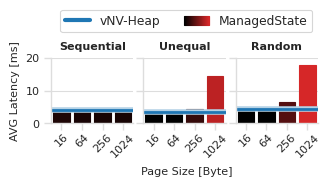

In [5]:
from util.plot import set_theme, save_plot
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
from matplotlib.lines import Line2D
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerTuple
import math

palette = set_theme(colors=2)

unit = "ms"
scaled_data = scale_data(dataset, unit)
scaled_data = scaled_data.copy()

# calculate average update latency
scaled_data["mean"] /= scaled_data["options.iterations"]

# change labels
scaled_data.loc[scaled_data["options.access_type"].str.contains("Partitioned"), "options.access_type"] = "Partitioned"
scaled_data.loc[scaled_data["options.access_type"].str.contains("Distributed"), "options.access_type"] = "Unequal"


vnv_heap_data = scaled_data[scaled_data["benchmark_id"] == "kvs"]
paged_data = scaled_data[scaled_data["benchmark_id"] == "kvs_paged"]

# make options.page_size int
paged_data["options.page_size"] = paged_data["options.page_size"].astype(int)

# change labels
paged_data["benchmark_title"] = "ManagedState"

# sort
access_types = ["Sequential", "Unequal", "Random"]
paged_data["options.access_type"] = pd.Categorical(paged_data["options.access_type"], access_types)
paged_data = paged_data.sort_values(by=["options.access_type"])


g = sns.catplot(
    data=paged_data,
    kind="bar",
    x="options.page_size", y="mean", hue="benchmark_title", col="options.access_type",
    col_wrap=4,
    errorbar="sd", alpha=1, aspect=(1/1.6)*(3.3/3) - (1/3) * 0.05, height=1.6, width=0.8,
    sharey=True,
)
g.set_titles("{col_name}")
g.set(xlabel=None, ylabel=f"AVG Latency [{unit}]")
g.tight_layout(pad=0)
g.legend.set_title("\nMeasurement")

def format_float(value, pos):
    if value == int(value) and not value == 1:
        return str(int(value))
    else:
        return str(value)

for (ax, access_type) in zip(g.axes, access_types):
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")
    ax.yaxis.set_major_formatter(FuncFormatter(format_float))
    
    height = vnv_heap_data[vnv_heap_data["options.access_type"] == access_type]["mean"].iloc[0]
    
    ax.axhline(y=height, color=sns.blend_palette(["white", palette[1]], n_colors=4)[1], linewidth=4)
    ax.axhline(y=height, color=palette[1], linewidth=2)
    # set bar colors depending on height
    for bar in ax.patches:
        if bar.get_height() < height:
            bar.set_color("black")
        else:
            bar.set_color(sns.blend_palette(["black", palette[0]], as_cmap=True)(math.sqrt(float(bar.get_height() - height)/float(paged_data["mean"].max() - height))))

#axins = zoomed_inset_axes(g.axes[1], 2, loc=1) # zoom = 6
g.figure.supxlabel("Page Size [Byte]", x=0.335, y=0.08, fontsize=8)
g.tight_layout(w_pad=0, h_pad=0)
g.legend.set(visible=False)

g.axes[0].set_yticks([0, 10, 20])

(_, legend_labels) = g.axes[-1].get_legend_handles_labels()
cmap_gradient = sns.blend_palette(["black", palette[0]], as_cmap=True)(np.linspace(0, 1, 100))

legend_handles = []

legend_handles.append([patches.Patch(facecolor=c, edgecolor=c, label=legend_labels[0]) for c in cmap_gradient])

legend_handles.insert(0, Line2D([0], [0], color=palette[1], lw=3))
legend_labels.insert(0, "vNV-Heap")
print(legend_handles, legend_labels)
plt.legend(
    handles = legend_handles,
    labels = legend_labels,
    loc = "lower center",
    bbox_to_anchor=(-0.6, 1.3),
    ncol=2,
    title=None,
    frameon=True,
    handler_map={list: HandlerTuple(ndivide=None, pad=0)}
)

save_plot(f"kvs", False)

# Compare Metadata Usage

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from util.plot import set_theme
import math

def plot_chunks(ax: plt.Axes, objs: list, unused_ram: int = 0):
    obj_cnt = sum(map(lambda x: x[0], objs))
    raw_obj_size = sum(map(lambda x: x[0]*x[1], objs))

    print("-- plotting chunks")
    print("obj cnt is:", obj_cnt)
    print("raw obj size is:", raw_obj_size)
    print("unused ram is:", unused_ram)

    palette = set_theme(colors=2)

    page_sizes = list(map(int, filter(lambda x: not math.isnan(x), dataset["options.page_size"].unique())))
    page_counts = list(map(lambda size: int(math.ceil(float(raw_obj_size + unused_ram) / float(size))), page_sizes))

    labels = list(map(lambda _: "ManagedState", page_sizes))

    data = pd.DataFrame({ "page_sizes": page_sizes, "page_counts": page_counts, "labels": labels })
    
    # scale: 1k
    data["page_counts"] /= 1000

    sns.barplot(
        data=data,
        ax=ax,
        x="page_sizes", y="page_counts",
        errorbar="sd", alpha=1,
        width=0.7
    )

    ax.set_xlabel("Page Size [Byte]")
    ax.set_ylabel("# Managed Chunks [k]")

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_yticks(list(range(5)))
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")

    vnv_heap_line = obj_cnt / 1000
    ax.axhline(y=vnv_heap_line, color=sns.blend_palette(["white", palette[1]], n_colors=4)[1], linewidth=4)
    ax.axhline(y=vnv_heap_line, color=palette[1], linewidth=2)

    for bar in ax.patches:
        if bar.get_height() < vnv_heap_line:
            bar.set_color("black")
        else:
            bar.set_color(sns.blend_palette(["black", palette[0]], as_cmap=True)(math.sqrt(float(bar.get_height() - vnv_heap_line)/(data["page_counts"].max() - vnv_heap_line))))


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from util.plot import set_theme
import math

metadata_paged_per_page = 1
metadata_heap_per_object = 4


def plot_metadata_usage(ax: plt.Axes, objs: list, unused_ram: int = 0):
    obj_cnt = sum(map(lambda x: x[0], objs))
    raw_obj_size = sum(map(lambda x: x[0]*x[1], objs))

    print("-- plotting metadata usage")
    print("obj cnt is:", obj_cnt)
    print("raw obj size is:", raw_obj_size)
    print("unused ram is:", unused_ram)

    palette = set_theme(colors=2)

    page_sizes = list(map(int, filter(lambda x: not math.isnan(x), dataset["options.page_size"].unique())))
    page_counts = list(map(lambda size: int(math.ceil(float(raw_obj_size + unused_ram) / float(size))), page_sizes))
    metadata_sizes = list(map(lambda cnt: cnt * metadata_paged_per_page, page_counts))
    labels = list(map(lambda _: "ManagedState", page_sizes))

    data = pd.DataFrame({ "page_sizes": page_sizes, "page_counts": page_counts, "metadata_sizes": metadata_sizes, "labels": labels })

    # scale: k
    data["metadata_sizes"] /= 1000

    sns.barplot(
        data=data,
        ax=ax,
        x="page_sizes", y="metadata_sizes",
        errorbar="sd", alpha=1,
        width=0.7
    )

    ax.set_xlabel("Page Size [Bytes]")
    ax.set_ylabel("Metadata [kB]")

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_yticks(list(range(5)))
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")

    vnv_heap_line = (obj_cnt * metadata_heap_per_object) / 1000
    ax.axhline(y=vnv_heap_line, color=sns.blend_palette(["white", palette[1]], n_colors=4)[1], linewidth=4)
    ax.axhline(y=vnv_heap_line, color=palette[1], linewidth=2)

    for bar in ax.patches:
        if bar.get_height() < vnv_heap_line:
            bar.set_color("black")
        else:
            bar.set_color(sns.blend_palette(["black", palette[0]], as_cmap=True)(math.sqrt(float(bar.get_height() - vnv_heap_line)/(data["metadata_sizes"].max() - vnv_heap_line))))



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from util.plot import set_theme
import math
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerTuple

objs = [(64, 32), (128, 128), (32, 256), (32, 1024)]
unused_ram = 0

(fig, axes) = plt.subplots(1, 2, figsize=(3.3, 3.3*0.45))


plot_chunks(axes[0], objs, unused_ram)
plot_metadata_usage(axes[1], objs, unused_ram)

axes[0].set_title("(a) Total Chunks", fontweight="bold")
axes[1].set_title("(b) Total Metadata", fontweight="bold")


cmap_gradient = sns.blend_palette(["black", palette[0]], as_cmap=True)(np.linspace(0, 1, 100))


legend_handles = []
legend_labels = []

legend_handles.append(Line2D([0], [0], color=palette[1], lw=2))
legend_labels.append("vNV-Heap")

legend_labels.append("ManagedState")
legend_handles.append([patches.Patch(facecolor=c, edgecolor=c, label="test") for c in cmap_gradient])


fig.legend(
    handles = legend_handles,
    labels = legend_labels,
    loc = "lower center",
    bbox_to_anchor=(0.55, 0.97),
    ncol=2,
    title=None,
    frameon=True,
    handler_map={list: HandlerTuple(ndivide=None, pad=0)}
)

fig.tight_layout()

# plot_metadata_size([(16+8, 32), (32+16, 128), (32, 256), (16, 1024), (8, 4096)], unused_ram=0)
# plot_metadata_size([((32+32)/2, 32), ((64+32)/2, 128), (64/2, 256), (16/2, 1024), (0/2, 4096)], unused_ram=0)
save_plot(f"kvs_chunks", False)